# Hypothesis Test for Comparing Machine Learning Algorithms

Machine learning models are chosen based on their mean performance, often calculated using k-fold cross-validation.

The algorithm with the best mean performance is expected to be better than those algorithms with poor mean performance. But what if the difference in the mean performance is caused by a statistical chance?

The solution is to use a statistical hypothesis test to evaluate whether the difference in the mean performance between any two algorithms is real or not.

In this tutorial, you will discover how to use statistical hypothesis tests for comparing machine learning algorithms.

After completing this tutorial, you will know:

* Performing model selection based on the mean model performance can be misleading.
* The five repeats of two-fold cross-validation with a modified Student’s t-Test is a good practice for comparing machine learning algorithms.
* How to use the **MLxtend** machine learning to compare algorithms using a statistical hypothesis test.

**Aside:** You can learn more about statistics and data science by signing in to my [week-end online classes](https://www.mlanddlguru.com/b/) or step-by-step tutorials and full source code from my [blog](https://kvssetty.com/)

Lets get started...

![random-sampling](../images/statistics.jpg)

## Tutorial Overview
This tutorial is divided into three parts; they are:

* **Hypothesis Test for Comparing Algorithms**
* **5×2 Procedure With MLxtend**
* **Comparing Classifier Algorithms**

## Hypothesis Test for Comparing Algorithms
Model selection involves evaluating a suite of different machine learning algorithms or modeling pipelines and comparing them based on their performance.

The model or modeling pipeline that achieves the best performance according to our performance metric is then selected as your final model that you can then use to start making predictions on unseen data/new data.

This applies to regression and classification predictive modeling tasks with classical machine learning algorithms as well as  deep learning algorithms. It's always the same process.

The problem is, how do you know the difference between two models is real and not just a statistical chance?

This problem can be addressed using a statistical hypothesis test.

One approach is to evaluate each model on the same [k-fold cross-validation](https://medium.com/@kvssetty/introduction-to-k-fold-cross-validation-2a93c783ef08) split of the data (e.g. using the same random number seed to split the data in each case) and calculate a score for each split. This would give a sample of 10 scores for 10-fold cross-validation. The scores can then be compared using a paired statistical hypothesis test because the same treatment (rows of data) was used for each algorithm to come up with each score. The Paired Student’s t-Test could be used.

A problem with using the Paired Student’s t-Test, in this case, is that each evaluation of the model is not independent. This is because the same rows of data are used to train the data multiple times(specifically, **k-1** times) — actually, each time, except for the time a row of data is used in the hold-out test fold. This lack of independence in the evaluation means that the Paired Student’s t-Test is optimistically biased.

This statistical test can be adjusted to take the lack of independence into account.

Additionally, the number of folds and repeats of the procedure can be configured to achieve a good sampling of model performance that generalizes well to a wide range of problems and algorithms. Specifically two-fold cross-validation with five repeats, so-called 5×2-fold cross-validation.

This approach was proposed by Thomas [Dietterich](https://en.wikipedia.org/wiki/Thomas_G._Dietterich) in his 1998 paper titled [Approximate Statistical Tests for Comparing Supervised Classification Learning Algorithms.](https://ieeexplore.ieee.org/document/6790639)

For more on this topic, we will have a separate tutorial shortly the title:
[Statistical Significance Tests for Comparing Machine Learning Algorithms]().


Thankfully, we don’t need to implement this procedure ourselves.

## 5×2 Procedure With MLxtend
The [MLxtend](http://rasbt.github.io/mlxtend/) library by [Sebastian Raschka](http://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_5x2cv/) provides an implementation via the `paired_ttest_5x2cv()` function.

You can find some info in the medium article [5 Obscure Python Libraries Every Data Scientist Should Know](https://medium.com/analytics-vidhya/5-obscure-python-libraries-every-data-scientist-should-know-3651bf5d3be3)

First, you must install the mlxtend library, for example:

```conda install -c conda-forge mlxtend
```

```
conda install -c conda-forge mlxtend

# or

pip install mlxtend
```

To use the evaluation, you must first load your dataset, then define the two models that you wish to compare.

```python...
# load data
X, y = ....
# define models
model1 = ...
model2 = ...
```

You can then call the `paired_ttest_5x2cv()` function and pass in your data and models and it will report the t-statistic value and the p-value as to whether the difference in the performance of the two algorithms is significant or not.

```python
...
# compare algorithms
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y)
```

The p-value must be interpreted using an alpha value, which is the significance level that you are willing to accept.(usually 0.01,0.05,0.1)

If the p-value is less or equal to the chosen alpha, we reject the null hypothesis that the models have the same mean performance, which means the difference is probably real. If the p-value is greater than alpha, we fail to reject the null hypothesis that the models have the same mean performance and any observed difference in the mean accuracies is probability a statistical chance.

The smaller the alpha value, the better, and a common value is 5 percent (0.05).

```python
...
# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')
```

Now that we are familiar with the way to use a hypothesis test to compare algorithms, let's look at some examples.

## Comparing Classifier Algorithms
In this section, let’s compare the performance of two machine learning algorithms on a binary classification task, then check if the observed difference is statistically significant or not.

First, we can use the [`make_classification()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to create a synthetic dataset with 1,000 samples and 20 input variables.

The example below creates the dataset and summarizes its shape.

In [1]:
# create classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


Running the example creates the dataset and summarizes the number of rows and columns, confirming our expectations.

We can use this data as the basis for comparing two algorithms.

We will compare the performance of two linear algorithms on this dataset. Specifically, a [logistic regression](https://scikit-learn.org/stable/modules/linear_model.html) algorithm and a [linear discriminant analysis (LDA)](https://scikit-learn.org/stable/modules/lda_qda.html) algorithm.

The procedure we like to use is repeated stratified k-fold cross-validation with 10 folds and three repeats(so,we will have 30 performance estimations for each model). We will use this procedure to evaluate each algorithm and return and report the mean classification accuracy.

The complete example is listed below.

In [2]:
# compare logistic regression and lda for binary classification
%matplotlib inline
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as pyplot

LogisticRegression Mean Accuracy: 0.892 (0.025)
LinearDiscriminantAnalysis Mean Accuracy: 0.894 (0.025)


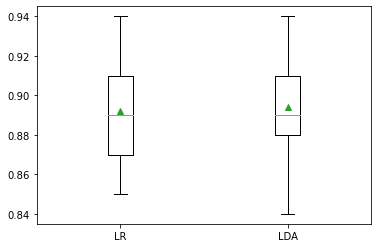

In [3]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# evaluate model 1
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=26)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('LogisticRegression Mean Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))
# evaluate model 2
model2 = LinearDiscriminantAnalysis()
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=26)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('LinearDiscriminantAnalysis Mean Accuracy: %.3f (%.3f)' % (np.mean(scores2), np.std(scores2)))
# plot the results
pyplot.boxplot([scores1, scores2], labels=['LR', 'LDA'], showmeans=True)
pyplot.show()

Running the example first reports the mean classification accuracy for each algorithm.

Your specific results may differ given the stochastic nature of the learning algorithms and evaluation procedure. Try running the example a few times.

In this case, the results suggest that LDA has better performance if we just look at the mean scores: 89.2 percent for logistic regression and 89.4 percent for LDA.

A box and whisker plot is also created summarizing the distribution of accuracy scores.

This plot would support my decision in choosing LDA over LR.

Now we can use a hypothesis test to see if the observed results are statistically significant.

First, we will use the 5×2 procedure to evaluate the algorithms and calculate a p-value and test statistic value.

```python
...
# check if difference between algorithms is real or is it just by chance.
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=26)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
```

We can then interpret the p-value using an alpha of 5 percent.

```python
...
# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')
```    

combining all the snippets together, the complete example is listed below.

In [4]:
# use 5x2 statistical hypothesis testing procedure to compare two machine learning algorithms
from mlxtend.evaluate import paired_ttest_5x2cv

In [5]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=26)
# evaluate model 1
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=26)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('LogisticRegression Mean Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))
# evaluate model 2
model2 = LinearDiscriminantAnalysis()
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=26)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('LinearDiscriminantAnalysis Mean Accuracy: %.3f (%.3f)' % (np.mean(scores2), np.std(scores2)))
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=26)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

LogisticRegression Mean Accuracy: 0.860 (0.037)
LinearDiscriminantAnalysis Mean Accuracy: 0.855 (0.039)
P-value: 0.049, t-Statistic: -2.596
Difference between mean performance is probably real


Running the example, we first evaluate the algorithms before, then report on the result of the statistical hypothesis test.

Your specific results may differ given the stochastic nature of the learning algorithms and evaluation procedure. Try running the example a few times.

In this case, we can see that the p-value is about 0.049, which is marginally than 0.05. This leads us to reject the null hypothesis, suggesting that any observed difference between the algorithms is probably real.

We could just as easily choose logistic regression or LDA and both would perform about the same on average.

This highlights that performing model selection based only on the mean performance may not be sufficient.

Recall that we are reporting performance using a different procedure (3×10 CV) than the procedure used to estimate the performance in the statistical test (5×2 CV). Perhaps results would be different if we looked at scores using five repeats of two-fold cross-validation?

The example below is updated to report classification accuracy for each algorithm using 5×2 CV.

In [6]:
# use 5x2 statistical hypothesis testing procedure to compare two machine learning algorithms
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=26)
# evaluate model 1
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=26)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('LogisticRegression Mean Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))
# evaluate model 2
model2 = LinearDiscriminantAnalysis()
cv2 = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=26)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('LinearDiscriminantAnalysis Mean Accuracy: %.3f (%.3f)' % (np.mean(scores2), np.std(scores2)))
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=26)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

LogisticRegression Mean Accuracy: 0.850 (0.015)
LinearDiscriminantAnalysis Mean Accuracy: 0.848 (0.016)
P-value: 0.049, t-Statistic: -2.596
Difference between mean performance is probably real


Running the example reports the mean accuracy for both algorithms and the results of the statistical test.

Your specific results may differ given the stochastic nature of the learning algorithms and evaluation procedure. Try running the example a few times.

In this case, we can see that the difference in the mean performance for the two algorithms is even larger, 85.00 percent vs. 84.8.0 percent in favor of logistic regression instead of LDA as we saw with 3×10 CV.

## Further Reading
This section provides more resources on the topic if you are looking to go deeper.
### papers
[Approximate Statistical Tests for Comparing Supervised Classification Learning Algorithms, 1998.](https://ieeexplore.ieee.org/document/6790639)
### APIs
[MLxtend Library](http://rasbt.github.io/mlxtend/)

[5x2cv paired t test API.](http://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_5x2cv/)

## Summary
In this tutorial, you discovered how to use statistical hypothesis tests for comparing machine learning algorithms.

Specifically, you learned:

* Performing model selection based on the mean model performance can be misleading.
* The five repeats of two-fold cross-validation with a modified Student’s t-Test is a good practice for comparing machine learning algorithms.
* How to use the MLxtend machine learning to compare algorithms using a statistical hypothesis test.

## Do you have any questions?
Ask your questions in the comments below and I will try to do my best to answer.